In [0]:
#from __future__ import divison, print_function, unicode_literals
import numpy as np
import tensorflow as tf

In [0]:
%matplotlib inline

In [0]:
import matplotlib
import matplotlib.pyplot as plt

In [0]:
from google.colab import files

In [0]:
files.upload()

In [0]:
#files.download('durudataset.txt')

In [0]:
print(tf.__version__)
print(np.__version__)
print(matplotlib.__version__)

1.12.0
1.14.6
2.1.2


In [0]:
from numpy import genfromtxt
my_data = genfromtxt('labelled_mean_na.csv', delimiter=',')

In [0]:
my_data

In [0]:
import pandas as pd
df = pd.read_csv('labelled_mean_na.csv')

In [0]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head(5)

In [0]:
def input_fn(df):
  training_dataset = (
      tf.data.Dataset.from_tensor_slices(
          (
              tf.cast(df.columns.values, tf.float32) ,
              None
          )
      )
  )
  return training_dataset

In [0]:
def load_dataset(name):
    return np.loadtxt(name)

dataset = load_dataset('durudataset.txt')

In [0]:
dataset

In [0]:
#import random
#input_2d_x_1 = np.array([[random.randint(1, 500) for i in range(2) for  j in range(50)]])
#input_2d_x_2 = np.array([[random.randint(400, 900) for i in range(2) for  j in range(50)]])
#input_2d_x_3 = np.array([[random.randint(800, 1300) for i in range(2) for  j in range(50)]])

#input_2d_x = np.append(np.append(input_2d_x_1,input_2d_x_2, axis=0), input_2d_x_3, axis=0)

In [0]:
#input_2d_x

In [0]:
def input_fn_2d(input_2d):
  input_t = tf.convert_to_tensor(input_2d, dtype=tf.float32)
  print(input_t)
  #return (input_t, None)

In [0]:
input_fn_2d(dataset)

Tensor("Const:0", shape=(40, 2), dtype=float32)


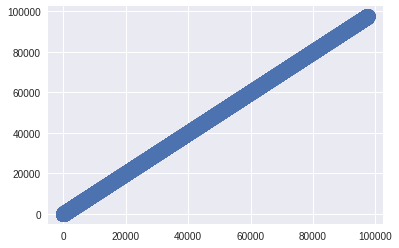

In [0]:
plt.scatter(my_data[:,0], my_data[:,1], s= 200)
plt.show()

In [0]:
from tensorflow.contrib.learn.python.learn.estimators import kmeans
from tensorflow.contrib.factorization.python.ops import clustering_ops

In [0]:
k_means_estimator = kmeans.KMeansClustering(num_clusters=3)
#k_means_estimator = kmeans.KMeansClustering(num_clusters=3, use_mini_batch=False,relative_tolerance=1)

In [0]:
fit = k_means_estimator.fit(input_fn=lambda: input_fn(df), steps = 1000)

In [0]:
clusters_2d = k_means_estimator.clusters()
clusters_2d

Instructions for updating:
Please use tf.contrib.factorization.KMeansClustering instead of tf.contrib.learn.KMeansClustering. It has a similar interface, but uses the tf.estimator.Estimator API instead of tf.contrib.learn.Estimator.


array([[0.24707153, 0.3768577 ],
       [1.5806149 , 1.5689654 ],
       [0.17893894, 0.12678389]], dtype=float32)

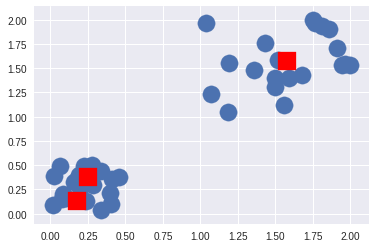

In [0]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dataset[:,0], dataset[:,1], s=300, marker='o')
ax1.scatter(clusters_2d[:,0], clusters_2d[:,1], c='r',s=300, marker='s')

plt.show()

In [0]:
k_means_estimator.get_params()

{'params': {'distance_metric': 'squared_euclidean',
  'kmeans_plus_plus_num_retries': 2,
  'mini_batch_steps_per_iteration': 1,
  'num_clusters': 3,
  'random_seed': 0,
  'relative_tolerance': None,
  'training_initial_clusters': 'random',
  'use_mini_batch': True}}

In [0]:
ex_2d_x = np.array([[0.239, 0.132]])

predict = k_means_estimator.predict(input_fn=lambda:input_fn_2d(ex_2d_x), as_iterable=True)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpas3685st/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [0]:
print(type(predict))

<class 'generator'>


In [0]:
print(next(predict))

{'all_scores': array([6.0020462e-02, 3.8648005e+00, 3.6345311e-03], dtype=float32), 'cluster_idx': 2}


In [0]:
predict_cluster = k_means_estimator.predict_cluster_idx(input_fn=lambda:input_fn_2d(ex_2d_x))


Instructions for updating:
Please use tf.contrib.factorization.KMeansClustering instead of tf.contrib.learn.KMeansClustering. It has a similar interface, but uses the tf.estimator.Estimator API instead of tf.contrib.learn.Estimator.


In [0]:
print(next(predict_cluster))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpas3685st/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
2


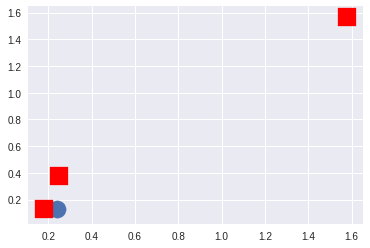

In [0]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(ex_2d_x[:,0], ex_2d_x[:,1], s=300, marker='o')
ax1.scatter(clusters_2d[:,0], clusters_2d[:,1], c='r',s=300, marker='s')

plt.show()